In [1]:
import pandas as pd
import numpy as np

from main import *

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import Wedge
mpl.style.use('ggplot')


import folium
from json import load

In [2]:
results = pd.read_csv('/home/adam/Datasets/WCA_export078_20230204T040001Z.tsv/WCA_export_Results.tsv', sep='\t')

In [3]:
all333fm = get_event(results, '333fm')

In [4]:
worst333fmsin = np.max(all333fm)

/home/adam/.conda/envs/tf/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/adam/.conda/envs/tf/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return reduction(axis=axis, out=out, **passkwargs)


In [5]:
sq1ua = to_seconds(remove_dnf(get_singles(get_event(get_country(results, 'Ukraine'), 'sq1'))))

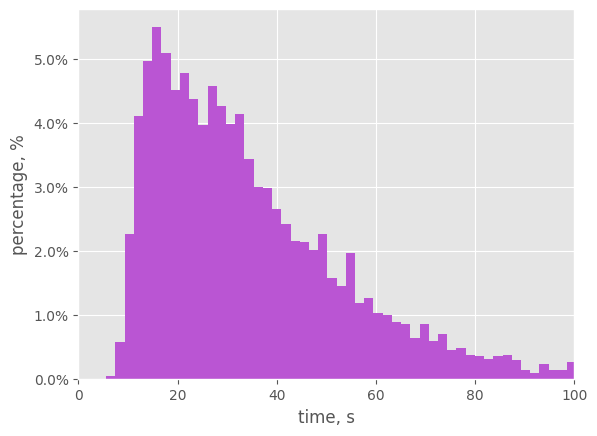

In [6]:
show_hist(sq1ua)

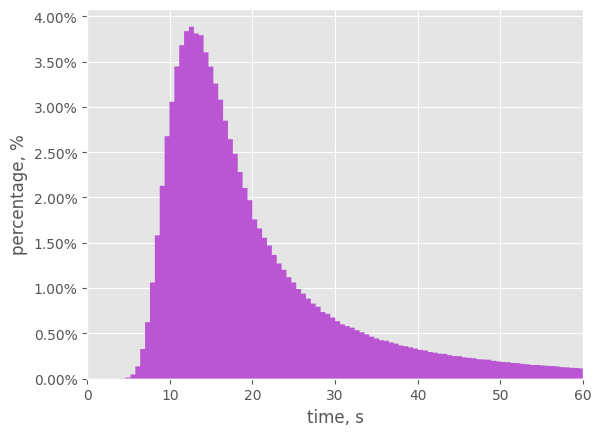

In [7]:
all333sin = to_seconds(remove_dnf(get_singles(get_event(results, '333'))))
show_hist(all333sin, bins=2000, xlim=(0, 60))

In [8]:
persons = pd.read_csv('/home/adam/Datasets/WCA_export078_20230204T040001Z.tsv/WCA_export_Persons.tsv', sep='\t')

In [10]:
persons['gender'] = (np.where((persons['gender'] != 'f') & (persons['gender'] != 'm'), np.nan, persons['gender']))
persons['gender'] = persons['gender'].replace(['f', 'm'], [0, 1])

sex, counts = np.unique(persons['gender'], return_counts=True)
counts = np.delete(counts, 2)
sex = sex[~np.isnan(sex)]

genders = pd.DataFrame({'people': counts}, index=['female', 'male'])

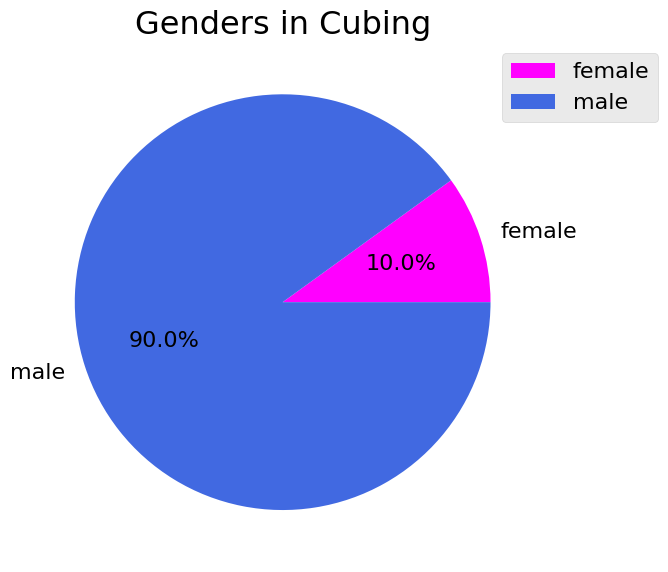

In [12]:
show_pie_chart(genders, 'Genders in Cubing' ,(0.9, 1), ['fuchsia','royalblue'])

In [13]:
continents = np.array([continent_dict[country] for country in np.array(persons['countryId'])])

names, counts = np.unique(continents, return_counts=True)

ppl_per_cont = pd.DataFrame({'people': counts}, index=names)

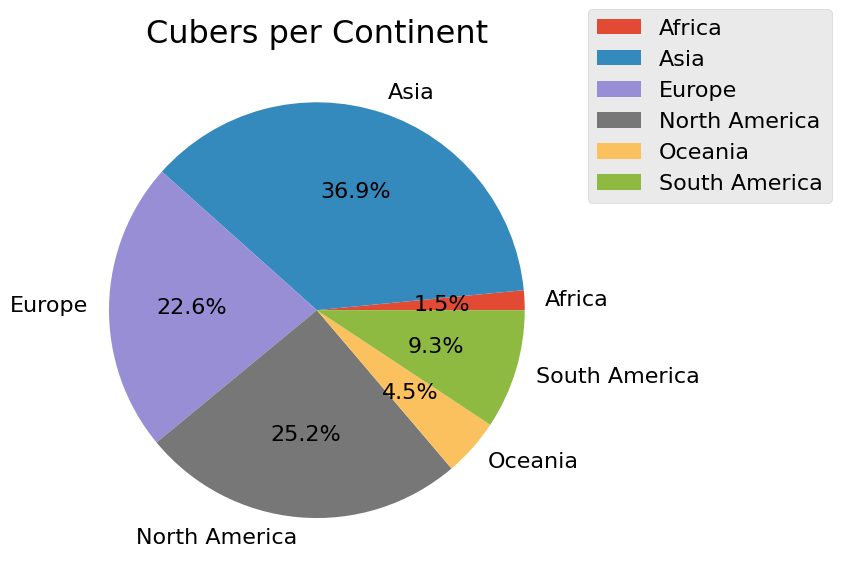

In [14]:
show_pie_chart(ppl_per_cont, 'Cubers per Continent', (1,1.1))

In [6]:
national_records_3x3 = get_national_records(df_to_seconds(get_event(drop_n_clean(results), '333')))

In [7]:
national_records_3x3

,time,country
0,12.37,Afghanistan
1,9.89,Albania
2,6.73,Algeria
3,12.29,Andorra
4,21.22,Angola
...,...,...
146,6.92,Venezuela
147,5.38,Vietnam
148,33.21,Yemen
149,17.12,Zambia


In [9]:
with open ('AT.json', 'r') as file:
    world_geo = load(file)

In [31]:
m = folium.Map(location=[0, 0], zoom_start=2)

folium.Choropleth(
    geo_data=world_geo,
    bins=8,
    name='choropleth',
    data=national_records_3x3,
    columns=['country', 'time'],
    key_on='feature.properties.name',
    fill_color='Greys',
    highlight=True,
    nan_fill_color='black',
    threshold_scale=[3, 4, 4.8, 6, 9, 15, 20, 101],
    fill_opacity=0.9,
    line_opacity=0.18,
    legend_name='National Record (seconds)',
    label='Red: no data'
    
).add_to(m)

folium.LayerControl().add_to(m)

m